# 方差分析

## 单因素方差分析

<table align='center'>
    <tr align='center'>
        <th>parameters</th>
        <th>explanation</th>
    </tr>
    <tr>
        <td align='center'>$SST$</td>
        <td align='center'>总体平方和</td>
    </tr>
    <tr>
        <td align='center'>$SSA$</td>
        <td align='center'>因素A的平方和</td>
    </tr>
    <tr>
        <td align='center'>$SSE$</td>
        <td align='center'>误差平方和</td>
    </tr>
    <tr>
        <td align='center'>$a$</td>
        <td align='center'>因素A的水平</td>
    </tr>
    <tr>
        <td align='center'>$n_i$</td>
        <td align='center'>因素A第i个水平的样本数量</td>
    </tr>
    <tr>
        <td align='center'>$y_{ij}$</td>
        <td align='center'>因素A第i个水平第j个实验观察值</td>
    </tr>
<table>
<style>
    td{
        align='center'
    }
</style>
计算公式如下：
$$
    \begin{array}{ll}
    SST = \sum_{i=1}^{a}\sum_{j=1}^{n_i}{{(y_{ij}-\bar y)}^2} \\
    SSA = \sum_{i=1}^{a}{n_i{(\bar y_{i}-\bar y)}^2} \\
    SSE = \sum_{i=1}^{a}\sum_{j=1}^{n_i}{{(y_{ij}-\bar y_i)}^2} \\
    SST = SSA + SSE
    \end{array}
$$
假设检验统计量
$$
    H_0 : \mu_1 = \mu_2 = \cdots = \mu_a \\
    H_1 : \mu_i 不完全相等 \\
    F = \frac{SSA/(a-1)}{SSE/(n-a)}=\frac{MSA}{MSE}
$$

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as ssa
from matplotlib import pyplot as plt

data_a = np.array([164, 190, 203, 205, 206, 214, 228, 257])
data_b = np.array([185, 197, 201, 231])
data_c = np.array([187, 212, 215, 220, 248, 265, 281])
geniepig_weight_df = pd.concat([pd.DataFrame({"A":data_a}),
                                pd.DataFrame({"B":data_b}),
                                pd.DataFrame({"C":data_c})],axis=1)
geniepig_weight_df = geniepig_weight_df.fillna(0)
geniepig_weight_df

,A,B,C
0,164,185.0,187.0
1,190,197.0,212.0
2,203,201.0,215.0
3,205,231.0,220.0
4,206,0.0,248.0
5,214,0.0,265.0
6,228,0.0,281.0
7,257,0.0,0.0


### F分析

0.002307593325694528

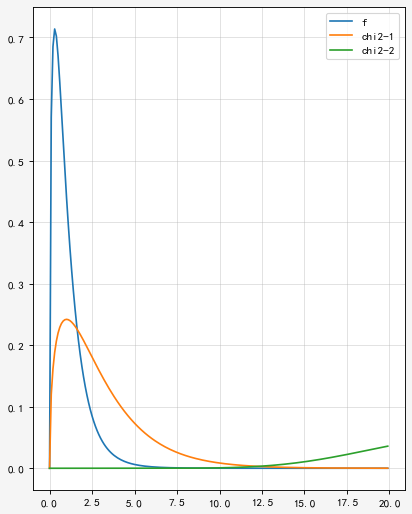

In [51]:
from scipy import stats

# 卡方分布的双侧p检验值
fig = plt.figure(figsize=(6,8),dpi=80,
                 facecolor='whitesmoke',
                 edgecolor='grey')
ax = plt.subplot(1,1,1)
f_x = np.arange(0,20,0.1)
f_y = stats.f.pdf(f_x,3,28)
chi_y = stats.chi2.pdf(f_x,3)
chi_y2 = stats.chi2.pdf(f_x,28)
ax.plot(f_x,f_y,label='f')
ax.plot(f_x,chi_y,label='chi2-1')
ax.plot(f_x,chi_y2,label='chi2-2')
ax.legend()
ax.grid(alpha=0.4)
p = stats.f.pdf(6.03,3,28)
p

# 单因素各水平均值比较

### 因素均值原理
通过各因素样本均值和样本方差估计总体均值的置信区间<br>
假设各因素以及全体数据误差方差均为$\sigma^2$<br>
那么各因素均服从$N(\mu_i,\sigma^2)$的正态分布<br>
因素样本均值$\mu_i$是总体均值$\mu_i$的一个无偏估计<br>
因素的样本方差${s_i}^2$在假设中即为总体方差，可以与SSE产生联系，即$SSE = (n-a){s_i}^2$<br>
那么可以使用样本均值构造$Z$，使用SSE构造$\chi^2$<br>
然后使用公式$\frac{Z}{\sqrt{\chi^2/\nu}}$构造$t(\nu)$学生检验

检验公式
$$
    \frac{\sqrt{n_i}(\bar y_i-\mu_i)}{\sqrt{SSE/(n-a)}} \sim t(n-a)
$$

### 因素间差值原理
检验公式
$$
    \frac{\bar y_i - \bar y_j -(\mu_i -\mu_j)}{\sqrt{(\frac{1}{n_i}+\frac{1}{n_j})SSE/(n-a)}} \sim t(n-a)
$$
Bonferrroni定理<br>
设$E_i$为m个随机事件，且$P(E_i)=1-\alpha$
\begin{equation}
    P(\cap_{i=1}^{m} E_i) = 1 - P(\cup_{i=1}^{m} \bar E_i) \ge 1 - \sum_{i=1}^{m}P(\bar E_i) = 1-m\alpha
\end{equation}
$$